Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [163]:
import pandas as pd
import numpy as np
import requests
import seaborn as sns
import json
from IPython.display import JSON #for nice JSON (or dict) display in JupyterLab

In [136]:
pd.read_csv('dublin_stations.csv')
df_dublin_stations = pd.read_csv('dublin_stations.csv')
df_dublin_stations = df_dublin_stations.drop('Unnamed: 0', axis=1)
df_dublin_stations

,name,searched_longitude,searched_latitude,number of bikes
0,WESTERN WAY,-6.269425,53.354929,40
1,PRINCES STREET / O'CONNELL STREET,-6.260311,53.349013,23
2,FITZWILLIAM SQUARE WEST,-6.252825,53.336074,30
3,BOLTON STREET,-6.269859,53.351182,20
4,GRANGEGORMAN LOWER (SOUTH),-6.278681,53.354663,40
...,...,...,...,...
109,JAMES STREET,-6.287409,53.343456,40
110,SANDWITH STREET,-6.247163,53.345203,40
111,CUSTOM HOUSE QUAY,-6.248048,53.347884,30
112,HANOVER QUAY,-6.237153,53.344115,40


In [42]:
pd.read_csv('yelp_df.csv')
yelp_df = pd.read_csv('yelp_df.csv')
yelp_df = yelp_df.drop('Unnamed: 0', axis=1)
yelp_df

,name,location,rating,distance,review_count,price,searched_latitude,searched_longitude
0,The Boxty House,20-21 Temple Bar,4.3,1130.342156,1231,€€€,53.354929,-6.269425
1,The Old Mill Restaurant,14 Temple Bar Square,4.5,1100.844806,229,€€,53.354929,-6.269425
2,Bleecker Street Cafe Bar,68 Dorset Street,4.6,421.257967,58,€€,53.354929,-6.269425
3,IL Vicoletto,5 Crow Street,4.5,1218.680265,131,€€€,53.354929,-6.269425
4,The Bank on College Green,20-22 College Green,4.4,1294.204466,441,€€€,53.354929,-6.269425
...,...,...,...,...,...,...,...,...
1135,Featherblade,51B Dawson Street,4.4,1632.667366,122,€€,53.354845,-6.247579
1136,Darkey Kellys,Hotel Harding,4.6,1926.342791,263,€€,53.354845,-6.247579
1137,F.X.Buckley,2 Crow Street,4.6,1569.462456,120,€€€,53.354845,-6.247579
1138,Pichet,14-15 Trinity Street,4.3,1547.853602,116,€€€,53.354845,-6.247579


In [44]:
pd.read_csv('fs_df.csv')
fs_df = pd.read_csv('fs_df.csv')
fs_df = fs_df.drop('Unnamed: 0', axis=1)
fs_df

,name,location,distance,searched_latitude,searched_longitude
0,La Pausa Caffe,1b-2 Blessington St,300,53.354929,-6.269425
1,The Black Sheep,61 Capel St,580,53.354929,-6.269425
2,Mr Fox Restaurant,"38 Parnell Square, Dublin, 1",375,53.354929,-6.269425
3,The Church,Junction Mary & Jervis Sts,725,53.354929,-6.269425
4,Brother Hubbard North,153 Capel St,868,53.354929,-6.269425
...,...,...,...,...,...
5609,Del Rio's Restaurant,110 Marlborough St,977,53.354845,-6.247579
5610,Masala Twist Indian Resturant & Kebab,"Unit-3, The Bailey, Wellington place, Trim, Co...",587,53.354845,-6.247579
5611,The chq Building,Custom House Quay,675,53.354845,-6.247579
5612,New Star Seafood Restaurant,"138 Parnell Street Dublin 1, Dublin, D1",766,53.354845,-6.247579


In [66]:
fs_merge = pd.merge(df_dublin_stations, fs_df, on=['searched_latitude', 'searched_longitude'])
fs_merge

,name_x,searched_longitude,searched_latitude,number of bikes,name_y,location,distance
0,WESTERN WAY,-6.269425,53.354929,40,La Pausa Caffe,1b-2 Blessington St,300
1,WESTERN WAY,-6.269425,53.354929,40,The Black Sheep,61 Capel St,580
2,WESTERN WAY,-6.269425,53.354929,40,Mr Fox Restaurant,"38 Parnell Square, Dublin, 1",375
3,WESTERN WAY,-6.269425,53.354929,40,The Church,Junction Mary & Jervis Sts,725
4,WESTERN WAY,-6.269425,53.354929,40,Brother Hubbard North,153 Capel St,868
...,...,...,...,...,...,...,...
5609,KILLARNEY STREET,-6.247579,53.354845,30,Del Rio's Restaurant,110 Marlborough St,977
5610,KILLARNEY STREET,-6.247579,53.354845,30,Masala Twist Indian Resturant & Kebab,"Unit-3, The Bailey, Wellington place, Trim, Co...",587
5611,KILLARNEY STREET,-6.247579,53.354845,30,The chq Building,Custom House Quay,675
5612,KILLARNEY STREET,-6.247579,53.354845,30,New Star Seafood Restaurant,"138 Parnell Street Dublin 1, Dublin, D1",766


In [72]:
yelp_merge = pd.merge(df_dublin_stations, yelp_df, on=['searched_latitude', 'searched_longitude'])
yelp_merge

,name_x,searched_longitude,searched_latitude,number of bikes,name_y,location,rating,distance,review_count,price
0,WESTERN WAY,-6.269425,53.354929,40,The Boxty House,20-21 Temple Bar,4.3,1130.342156,1231,€€€
1,WESTERN WAY,-6.269425,53.354929,40,The Old Mill Restaurant,14 Temple Bar Square,4.5,1100.844806,229,€€
2,WESTERN WAY,-6.269425,53.354929,40,Bleecker Street Cafe Bar,68 Dorset Street,4.6,421.257967,58,€€
3,WESTERN WAY,-6.269425,53.354929,40,IL Vicoletto,5 Crow Street,4.5,1218.680265,131,€€€
4,WESTERN WAY,-6.269425,53.354929,40,The Bank on College Green,20-22 College Green,4.4,1294.204466,441,€€€
...,...,...,...,...,...,...,...,...,...,...
1135,KILLARNEY STREET,-6.247579,53.354845,30,Featherblade,51B Dawson Street,4.4,1632.667366,122,€€
1136,KILLARNEY STREET,-6.247579,53.354845,30,Darkey Kellys,Hotel Harding,4.6,1926.342791,263,€€
1137,KILLARNEY STREET,-6.247579,53.354845,30,F.X.Buckley,2 Crow Street,4.6,1569.462456,120,€€€
1138,KILLARNEY STREET,-6.247579,53.354845,30,Pichet,14-15 Trinity Street,4.3,1547.853602,116,€€€


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

<Axes: xlabel='searched_longitude', ylabel='searched_latitude'>

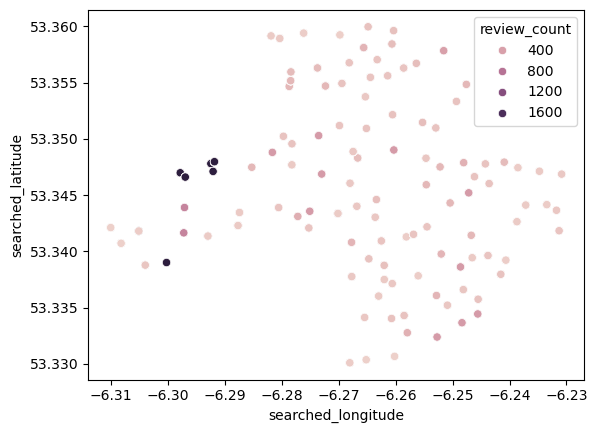

In [167]:
sns.scatterplot(
    data=yelp_merge,
    x='searched_longitude',
    y='searched_latitude',
    hue='review_count')

<Axes: xlabel='searched_longitude', ylabel='searched_latitude'>

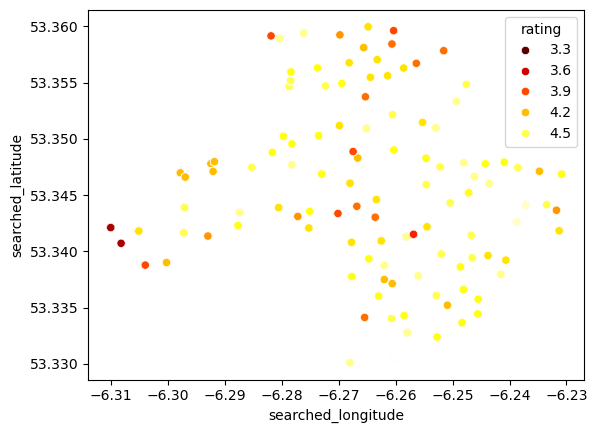

In [181]:
sns.scatterplot(
    data=yelp_merge,
    x='searched_longitude',
    y='searched_latitude',
    hue='rating',
    palette='hot')

<Axes: xlabel='rating', ylabel='Count'>

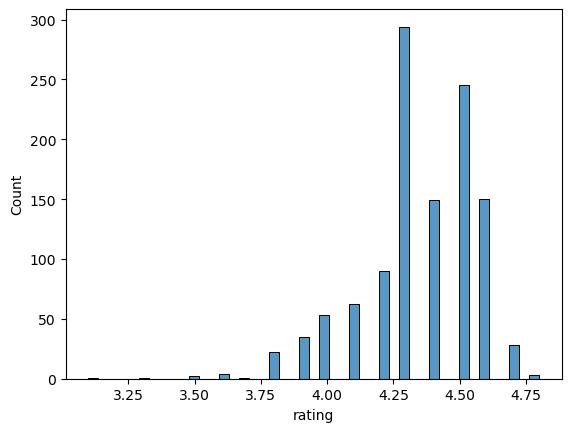

In [183]:
sns.histplot(yelp_merge['rating'])

The distribution of the ratings is left-skewed

Checked to see if the distance of a restaurant/place to a bike station affects the rating of it. The visualization does not show much of a relationship between distance and rating.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

In [112]:
import sqlite3
from sqlite3 import Error

In [114]:
# Step 1: Connect to (or create) a SQLite database
conn = sqlite3.connect("citybikes.db")

In [120]:
# Step 2: Write the DataFrames to tables
df_dublin_stations.to_sql("dublin_stations", conn, index=False)
fs_df.to_sql("fs_df", conn, index=False)
fs_merge.to_sql("fs_merge", conn, index=False)
yelp_df.to_sql("yelp_df", conn, index=False)
yelp_merge.to_sql("yelp_merge", conn, index=False)

1140

In [124]:
# Step 3: Confirm it's written by querying
cursor = conn.cursor()
cursor.execute("SELECT * FROM dublin_stations LIMIT 10")
rows = cursor.fetchall()
for row in rows:
    print(row)

('WESTERN WAY', -6.269425, 53.354929, 40)
("PRINCES STREET / O'CONNELL STREET", -6.260311, 53.349013, 23)
('FITZWILLIAM SQUARE WEST', -6.252825, 53.336074, 30)
('BOLTON STREET', -6.269859, 53.351182, 20)
('GRANGEGORMAN LOWER (SOUTH)', -6.278681, 53.354663, 40)
('SMITHFIELD', -6.278214, 53.347692, 30)
('YORK STREET EAST', -6.262003, 53.338755, 32)
('CLARENDON ROW', -6.262501, 53.340927, 31)
('ECCLES STREET EAST', -6.265601, 53.358115, 27)
('KING STREET NORTH', -6.273507, 53.350291, 30)


In [126]:
cursor = conn.cursor()
cursor.execute("SELECT * FROM fs_df LIMIT 10")
rows = cursor.fetchall()
for row in rows:
    print(row)

('La Pausa Caffe', '1b-2 Blessington St', 300, 53.354929, -6.269425)
('The Black Sheep', '61 Capel St', 580, 53.354929, -6.269425)
('Mr Fox Restaurant', '38 Parnell Square, Dublin, 1', 375, 53.354929, -6.269425)
('The Church', 'Junction Mary & Jervis Sts', 725, 53.354929, -6.269425)
('Brother Hubbard North', '153 Capel St', 868, 53.354929, -6.269425)
('Aobaba', '46A Capel St', 679, 53.354929, -6.269425)
('Vice Coffee Inc', '54, Middle Abbey St', 910, 53.354929, -6.269425)
('Arisu', '119 Capel St', 668, 53.354929, -6.269425)
('Musashi Noodles & Sushi BAR', '15 Capel St', 888, 53.354929, -6.269425)
("Gino's Gelato", '41 Henry St', 779, 53.354929, -6.269425)


In [128]:
cursor = conn.cursor()
cursor.execute("SELECT * FROM fs_merge LIMIT 10")
rows = cursor.fetchall()
for row in rows:
    print(row)

('WESTERN WAY', -6.269425, 53.354929, 40, 'La Pausa Caffe', '1b-2 Blessington St', 300)
('WESTERN WAY', -6.269425, 53.354929, 40, 'The Black Sheep', '61 Capel St', 580)
('WESTERN WAY', -6.269425, 53.354929, 40, 'Mr Fox Restaurant', '38 Parnell Square, Dublin, 1', 375)
('WESTERN WAY', -6.269425, 53.354929, 40, 'The Church', 'Junction Mary & Jervis Sts', 725)
('WESTERN WAY', -6.269425, 53.354929, 40, 'Brother Hubbard North', '153 Capel St', 868)
('WESTERN WAY', -6.269425, 53.354929, 40, 'Aobaba', '46A Capel St', 679)
('WESTERN WAY', -6.269425, 53.354929, 40, 'Vice Coffee Inc', '54, Middle Abbey St', 910)
('WESTERN WAY', -6.269425, 53.354929, 40, 'Arisu', '119 Capel St', 668)
('WESTERN WAY', -6.269425, 53.354929, 40, 'Musashi Noodles & Sushi BAR', '15 Capel St', 888)
('WESTERN WAY', -6.269425, 53.354929, 40, "Gino's Gelato", '41 Henry St', 779)


In [130]:
cursor = conn.cursor()
cursor.execute("SELECT * FROM yelp_df LIMIT 10")
rows = cursor.fetchall()
for row in rows:
    print(row)

('The Boxty House', '20-21 Temple Bar', 4.3, 1130.3421559969704, 1231, '€€€', 53.354929, -6.269425)
('The Old Mill Restaurant', '14 Temple Bar Square', 4.5, 1100.84480638564, 229, '€€', 53.354929, -6.269425)
('Bleecker Street Cafe Bar', '68 Dorset Street', 4.6, 421.2579668805471, 58, '€€', 53.354929, -6.269425)
('IL Vicoletto', '5 Crow Street', 4.5, 1218.680265447323, 131, '€€€', 53.354929, -6.269425)
('The Bank on College Green', '20-22 College Green', 4.4, 1294.2044660914846, 441, '€€€', 53.354929, -6.269425)
("The Pig's Ear", '4 Nassau Street', 4.3, 1708.6684826374292, 238, '€€€', 53.354929, -6.269425)
('Darkey Kellys', 'Hotel Harding', 4.6, 1226.1722055941184, 263, '€€', 53.354929, -6.269425)
('Pichet', '14-15 Trinity Street', 4.3, 1285.58973436495, 116, '€€€', 53.354929, -6.269425)
('L Mulligan Grocer', '18 Stoneybatter', 4.3, 967.5291210431694, 215, '€€', 53.354929, -6.269425)
('Featherblade', '51B Dawson Street', 4.4, 1647.9754487976254, 122, '€€', 53.354929, -6.269425)


In [132]:
cursor = conn.cursor()
cursor.execute("SELECT * FROM yelp_merge LIMIT 10")
rows = cursor.fetchall()
for row in rows:
    print(row)

('WESTERN WAY', -6.269425, 53.354929, 40, 'The Boxty House', '20-21 Temple Bar', 4.3, 1130.3421559969704, 1231, '€€€')
('WESTERN WAY', -6.269425, 53.354929, 40, 'The Old Mill Restaurant', '14 Temple Bar Square', 4.5, 1100.84480638564, 229, '€€')
('WESTERN WAY', -6.269425, 53.354929, 40, 'Bleecker Street Cafe Bar', '68 Dorset Street', 4.6, 421.2579668805471, 58, '€€')
('WESTERN WAY', -6.269425, 53.354929, 40, 'IL Vicoletto', '5 Crow Street', 4.5, 1218.680265447323, 131, '€€€')
('WESTERN WAY', -6.269425, 53.354929, 40, 'The Bank on College Green', '20-22 College Green', 4.4, 1294.2044660914846, 441, '€€€')
('WESTERN WAY', -6.269425, 53.354929, 40, "The Pig's Ear", '4 Nassau Street', 4.3, 1708.6684826374292, 238, '€€€')
('WESTERN WAY', -6.269425, 53.354929, 40, 'Darkey Kellys', 'Hotel Harding', 4.6, 1226.1722055941184, 263, '€€')
('WESTERN WAY', -6.269425, 53.354929, 40, 'Pichet', '14-15 Trinity Street', 4.3, 1285.58973436495, 116, '€€€')
('WESTERN WAY', -6.269425, 53.354929, 40, 'L Mulli

Look at the data before and after the join to validate your data.

In [148]:
# Original dublin city df
df_dublin_stations.head()

,name,searched_longitude,searched_latitude,number of bikes
0,WESTERN WAY,-6.269425,53.354929,40
1,PRINCES STREET / O'CONNELL STREET,-6.260311,53.349013,23
2,FITZWILLIAM SQUARE WEST,-6.252825,53.336074,30
3,BOLTON STREET,-6.269859,53.351182,20
4,GRANGEGORMAN LOWER (SOUTH),-6.278681,53.354663,40


In [144]:
# Original foursquare and yelp poi dfs
fs_df.head()

,name,location,distance,searched_latitude,searched_longitude
0,La Pausa Caffe,1b-2 Blessington St,300,53.354929,-6.269425
1,The Black Sheep,61 Capel St,580,53.354929,-6.269425
2,Mr Fox Restaurant,"38 Parnell Square, Dublin, 1",375,53.354929,-6.269425
3,The Church,Junction Mary & Jervis Sts,725,53.354929,-6.269425
4,Brother Hubbard North,153 Capel St,868,53.354929,-6.269425


In [146]:
yelp_df.head()

,name,location,rating,distance,review_count,price,searched_latitude,searched_longitude
0,The Boxty House,20-21 Temple Bar,4.3,1130.342156,1231,€€€,53.354929,-6.269425
1,The Old Mill Restaurant,14 Temple Bar Square,4.5,1100.844806,229,€€,53.354929,-6.269425
2,Bleecker Street Cafe Bar,68 Dorset Street,4.6,421.257967,58,€€,53.354929,-6.269425
3,IL Vicoletto,5 Crow Street,4.5,1218.680265,131,€€€,53.354929,-6.269425
4,The Bank on College Green,20-22 College Green,4.4,1294.204466,441,€€€,53.354929,-6.269425


In [154]:
# merged foursquare df
fs_merge.head()

,name_x,searched_longitude,searched_latitude,number of bikes,name_y,location,distance
0,WESTERN WAY,-6.269425,53.354929,40,La Pausa Caffe,1b-2 Blessington St,300
1,WESTERN WAY,-6.269425,53.354929,40,The Black Sheep,61 Capel St,580
2,WESTERN WAY,-6.269425,53.354929,40,Mr Fox Restaurant,"38 Parnell Square, Dublin, 1",375
3,WESTERN WAY,-6.269425,53.354929,40,The Church,Junction Mary & Jervis Sts,725
4,WESTERN WAY,-6.269425,53.354929,40,Brother Hubbard North,153 Capel St,868


In [156]:
# merged yelp df
yelp_merge.head()

,name_x,searched_longitude,searched_latitude,number of bikes,name_y,location,rating,distance,review_count,price
0,WESTERN WAY,-6.269425,53.354929,40,The Boxty House,20-21 Temple Bar,4.3,1130.342156,1231,€€€
1,WESTERN WAY,-6.269425,53.354929,40,The Old Mill Restaurant,14 Temple Bar Square,4.5,1100.844806,229,€€
2,WESTERN WAY,-6.269425,53.354929,40,Bleecker Street Cafe Bar,68 Dorset Street,4.6,421.257967,58,€€
3,WESTERN WAY,-6.269425,53.354929,40,IL Vicoletto,5 Crow Street,4.5,1218.680265,131,€€€
4,WESTERN WAY,-6.269425,53.354929,40,The Bank on College Green,20-22 College Green,4.4,1294.204466,441,€€€
